<a href="https://colab.research.google.com/github/celestemiriams/Andela/blob/master/loan_default_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Mount the google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#install the kaggle library
!pip install kaggle

In [ ]:
! mkdir ~/.kaggle

In [ ]:
!cp /content/drive/MyDrive/kaggle/kaggle.json ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d nikhil1e9/loan-default

  0% 0.00/7.86M [00:00<?, ?B/s]
100% 7.86M/7.86M [00:00<00:00, 125MB/s]


In [ ]:
!unzip loan-default.zip

Archive:  loan-default.zip
  inflating: Loan_default.csv        


# **Loan Default Prediction**

#### **Problem Statement**: Financial loan services are leveraged by companies across many industries, from big banks to financial institutions to government loans. One of the primary objectives of companies with financial loan services is to decrease payment defaults and ensure that individuals are paying back their loans as expected. In order to do this efficiently and systematically, many companies employ machine learning to predict which individuals are at the highest risk of defaulting on their loans, so that proper interventions can be effectively deployed to the right audience.

In [ ]:
# Import necessary libraries
import warnings
warnings.filterwarnings("ignore")
import sklearn
import seaborn as sns
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_predict, GridSearchCV
from sklearn.metrics import (accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, roc_curve, auc, confusion_matrix, classification_report)
from sklearn.neighbors import NearestCentroid
import xgboost as xgb
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import cross_val_score

In [ ]:
#Load the dataset
data = pd.read_csv('Loan_default.csv')

## **Exploratory Data Analysis EDA**




In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255347 entries, 0 to 255346
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   LoanID          255347 non-null  object 
 1   Age             255347 non-null  int64  
 2   Income          255347 non-null  int64  
 3   LoanAmount      255347 non-null  int64  
 4   CreditScore     255347 non-null  int64  
 5   MonthsEmployed  255347 non-null  int64  
 6   NumCreditLines  255347 non-null  int64  
 7   InterestRate    255347 non-null  float64
 8   LoanTerm        255347 non-null  int64  
 9   DTIRatio        255347 non-null  float64
 10  Education       255347 non-null  object 
 11  EmploymentType  255347 non-null  object 
 12  MaritalStatus   255347 non-null  object 
 13  HasMortgage     255347 non-null  object 
 14  HasDependents   255347 non-null  object 
 15  LoanPurpose     255347 non-null  object 
 16  HasCoSigner     255347 non-null  object 
 17  Default   

The dataset is a huge dataset with 255347 entries and 18 columns. The target column being **Default**

In [ ]:
data.describe()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Default
count,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000
mean,43.498306,82499.304597,127578.865512,574.264346,59.541976,2.501036,13.492773,36.025894,0.500212,0.116128
std,14.990258,38963.013729,70840.706142,158.903867,34.643376,1.117018,6.636443,16.969330,0.230917,0.320379
min,18.000000,15000.000000,5000.000000,300.000000,0.000000,1.000000,2.000000,12.000000,0.100000,0.000000
25%,31.000000,48825.500000,66156.000000,437.000000,30.000000,2.000000,7.770000,24.000000,0.300000,0.000000
50%,43.000000,82466.000000,127556.000000,574.000000,60.000000,2.000000,13.460000,36.000000,0.500000,0.000000
75%,56.000000,116219.000000,188985.000000,712.000000,90.000000,3.000000,19.250000,48.000000,0.700000,0.000000
max,69.000000,149999.000000,249999.000000,849.000000,119.000000,4.000000,25.000000,60.000000,0.900000,1.000000


In [ ]:
#check for duplicate values
data.duplicated().sum()

0

The dataset has no duplicate values

In [ ]:
#check for missing values
data.isnull().sum()

LoanID            0
Age               0
Income            0
LoanAmount        0
CreditScore       0
MonthsEmployed    0
NumCreditLines    0
InterestRate      0
LoanTerm          0
DTIRatio          0
Education         0
EmploymentType    0
MaritalStatus     0
HasMortgage       0
HasDependents     0
LoanPurpose       0
HasCoSigner       0
Default           0
dtype: int64

There are no missing values in the dataset

In [ ]:
loan_id = data['LoanID'].copy()
#Drop Loan ID column
data.drop('LoanID', axis=1, inplace=True)

### **Distribution of the target variable (Default) in the dataset**

In [ ]:
palette_color = sns.color_palette('bright')

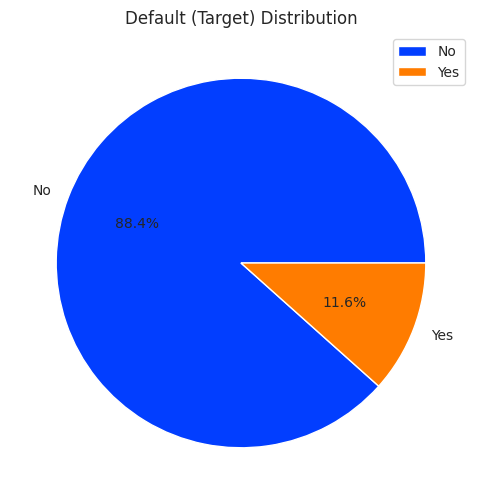

In [ ]:
sns.set_style("whitegrid") # Set style for chart
plt.figure(figsize=(6,6)) # Set figure size
plt.pie(data['Default'].value_counts(), labels=['No', 'Yes'], colors= palette_color, autopct='%1.1f%%') # Create pie chart
plt.legend()
plt.title('Default (Target) Distribution')
plt.show() # Show chart

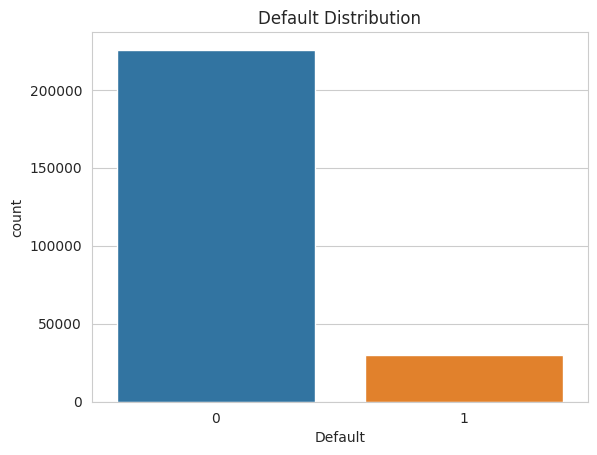

In [ ]:
sns.countplot(x='Default', data=data, )
plt.title('Default Distribution')
plt.show()

There is a high imbalance in the Default classes of 0: 88.7% and 1: 11.3% in the dataset. This will make the results to be heaily skewed so we shall use some techniques to handle this imbalance later on.

### **A correlation matrix to understand the relationship between Numerical features**

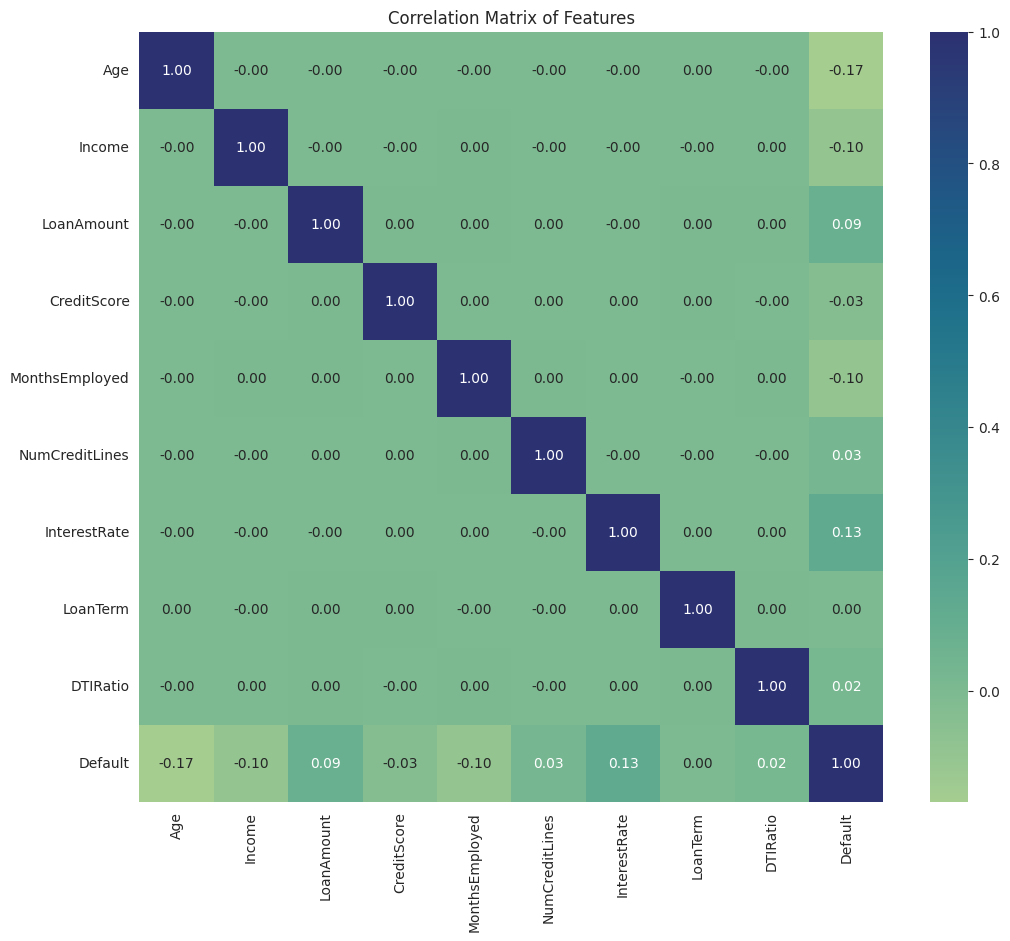

In [ ]:
# Correlation Matrix Heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(data.corr(), annot=True, fmt='.2f', cmap='crest')
plt.title('Correlation Matrix of Features')
plt.show()

In [ ]:
#get the numerical and categorical columns in the dataset
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = data.select_dtypes(include=['object']).columns

### **Relationship between Default and Numerical features**

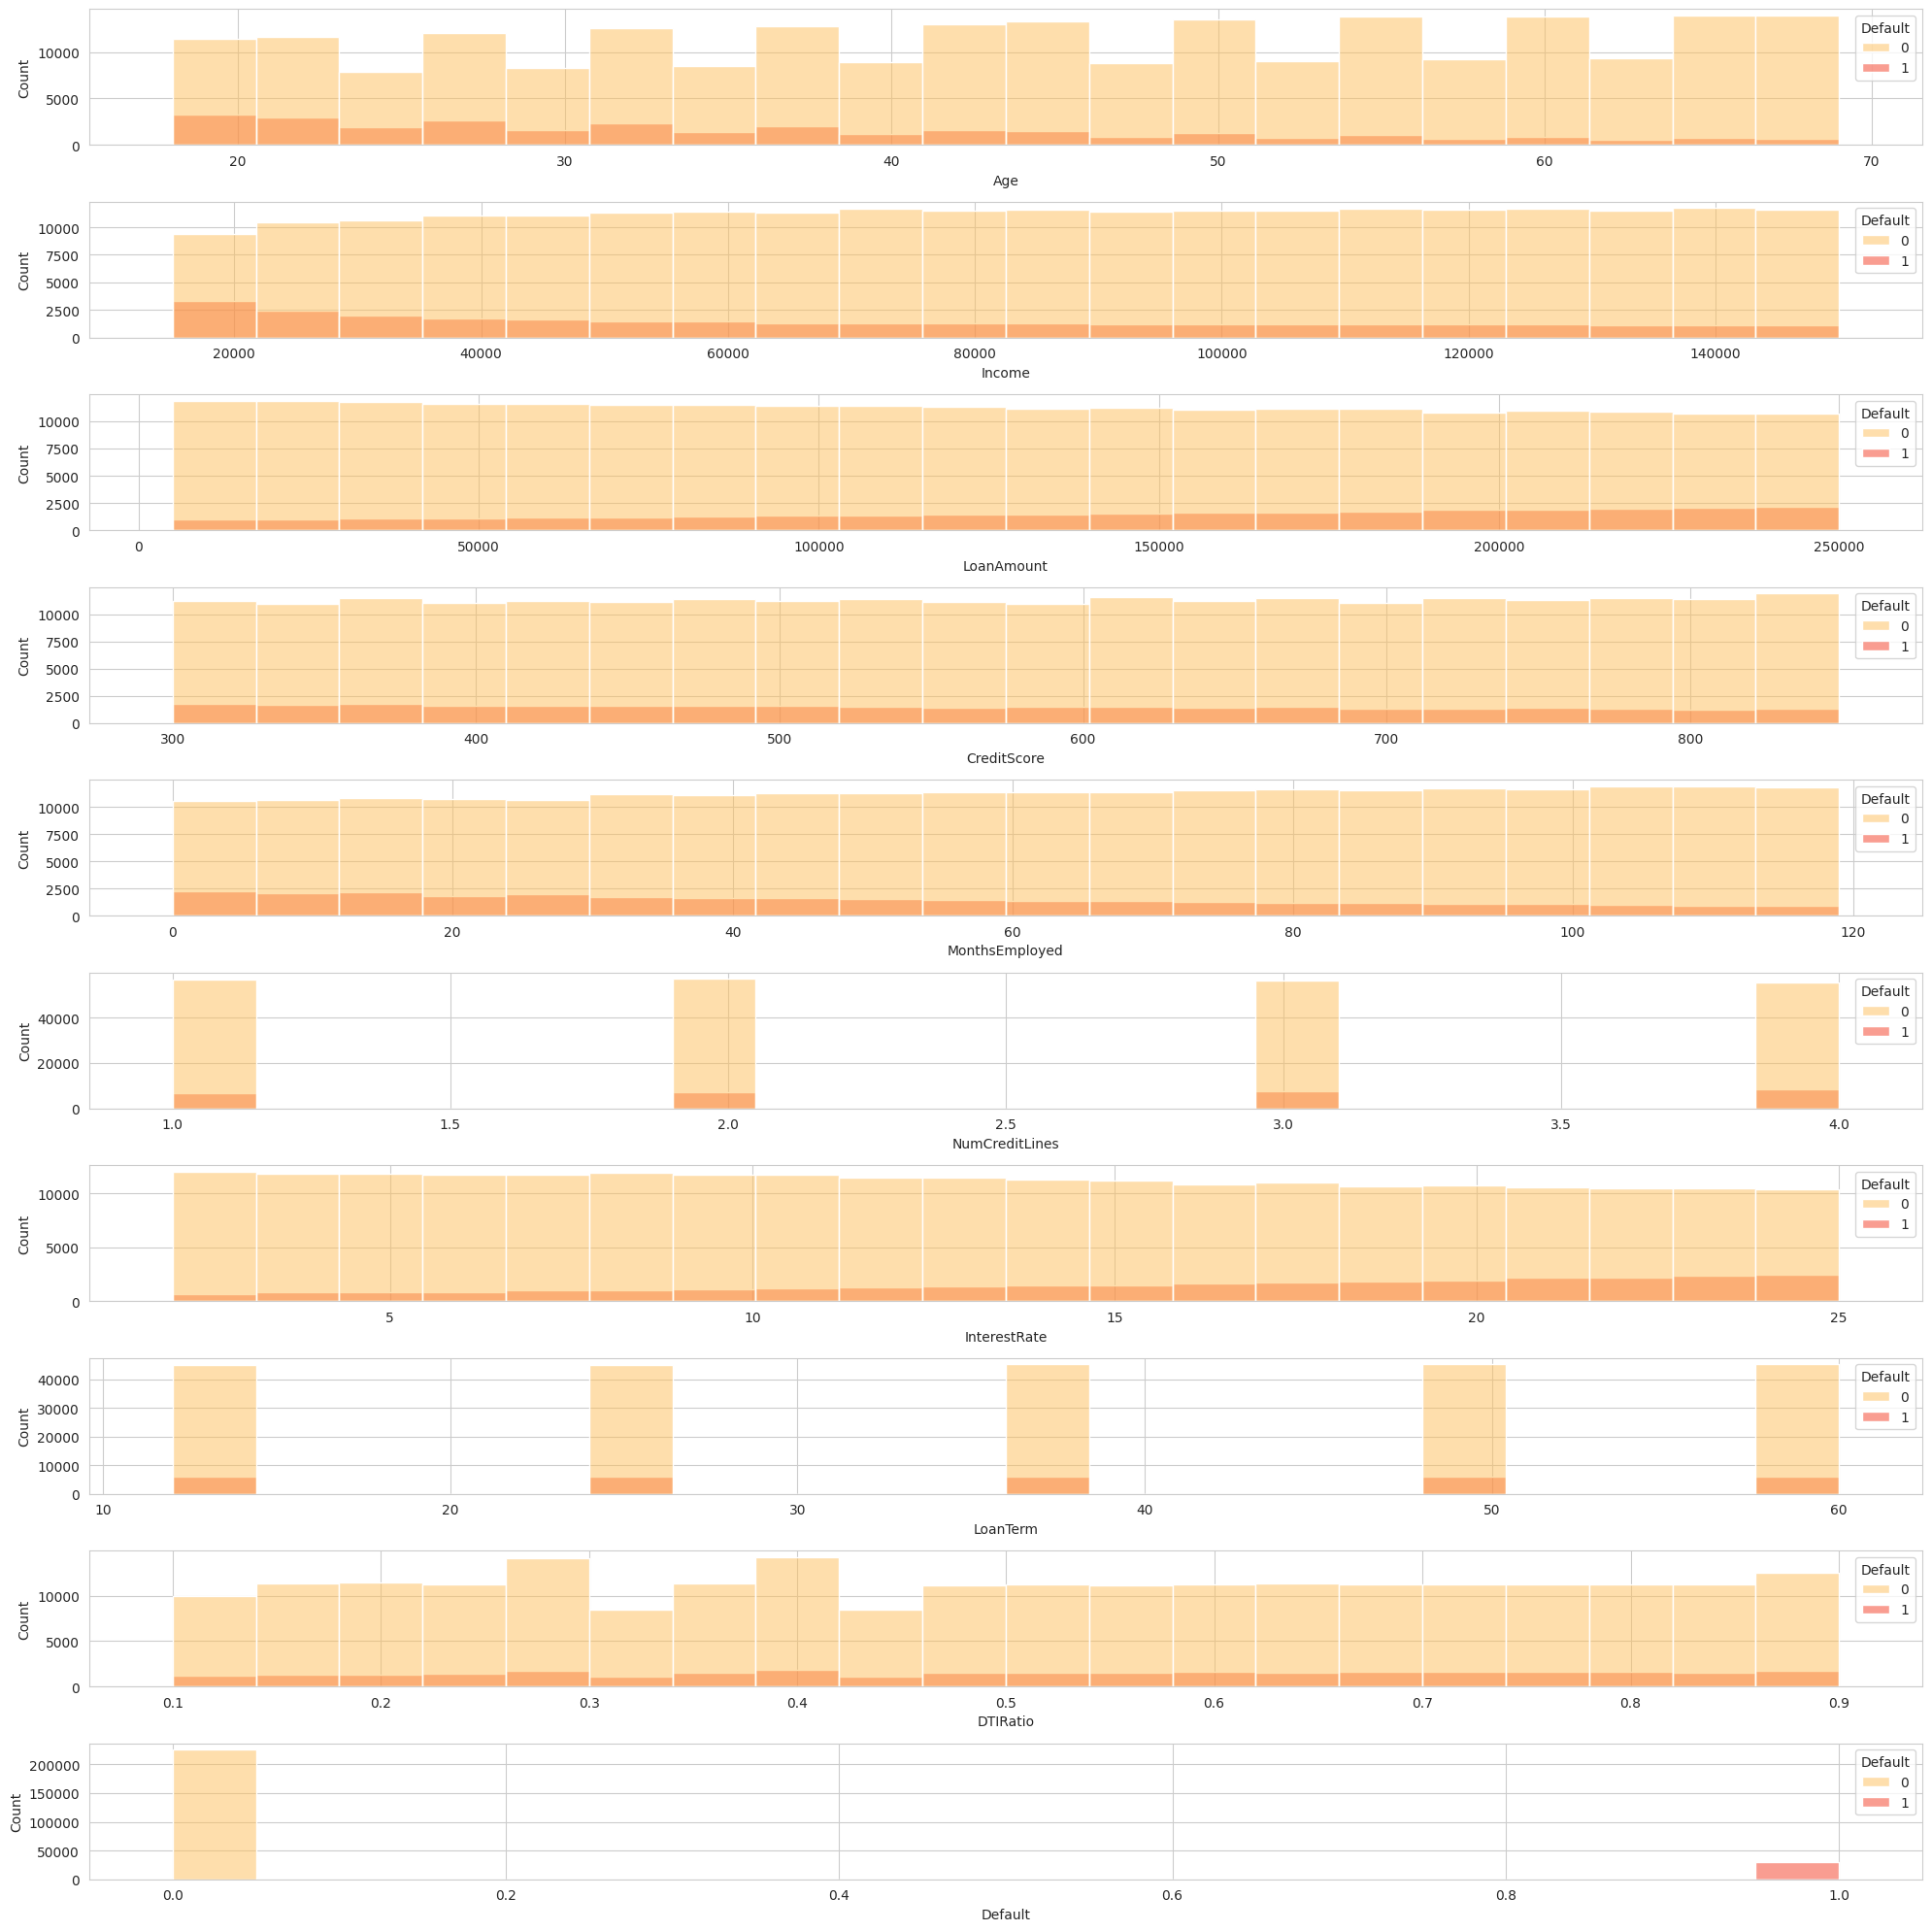

In [ ]:
plt.figure(figsize=(20, 20))
for i, column in enumerate(numerical_cols, 1):
    plt.subplot(10, 1, i)
    sns.histplot(data=data, x=column, hue='Default', bins=20, palette='YlOrRd')
plt.tight_layout()
plt.show()

Looking at the numerical relationships we see that:

*   People in their 20's are more likely to default compared to older ones above 50 years.
*   People with an income of 20,000 are likely to default compared to those with a higher income
* People with a higher loan amount above 150, 000 are likely to default
* People who have been employed only a few months default the loan
* People with a high interest rate above 15% default the loan



### **Relationship between Default and Categorical features**

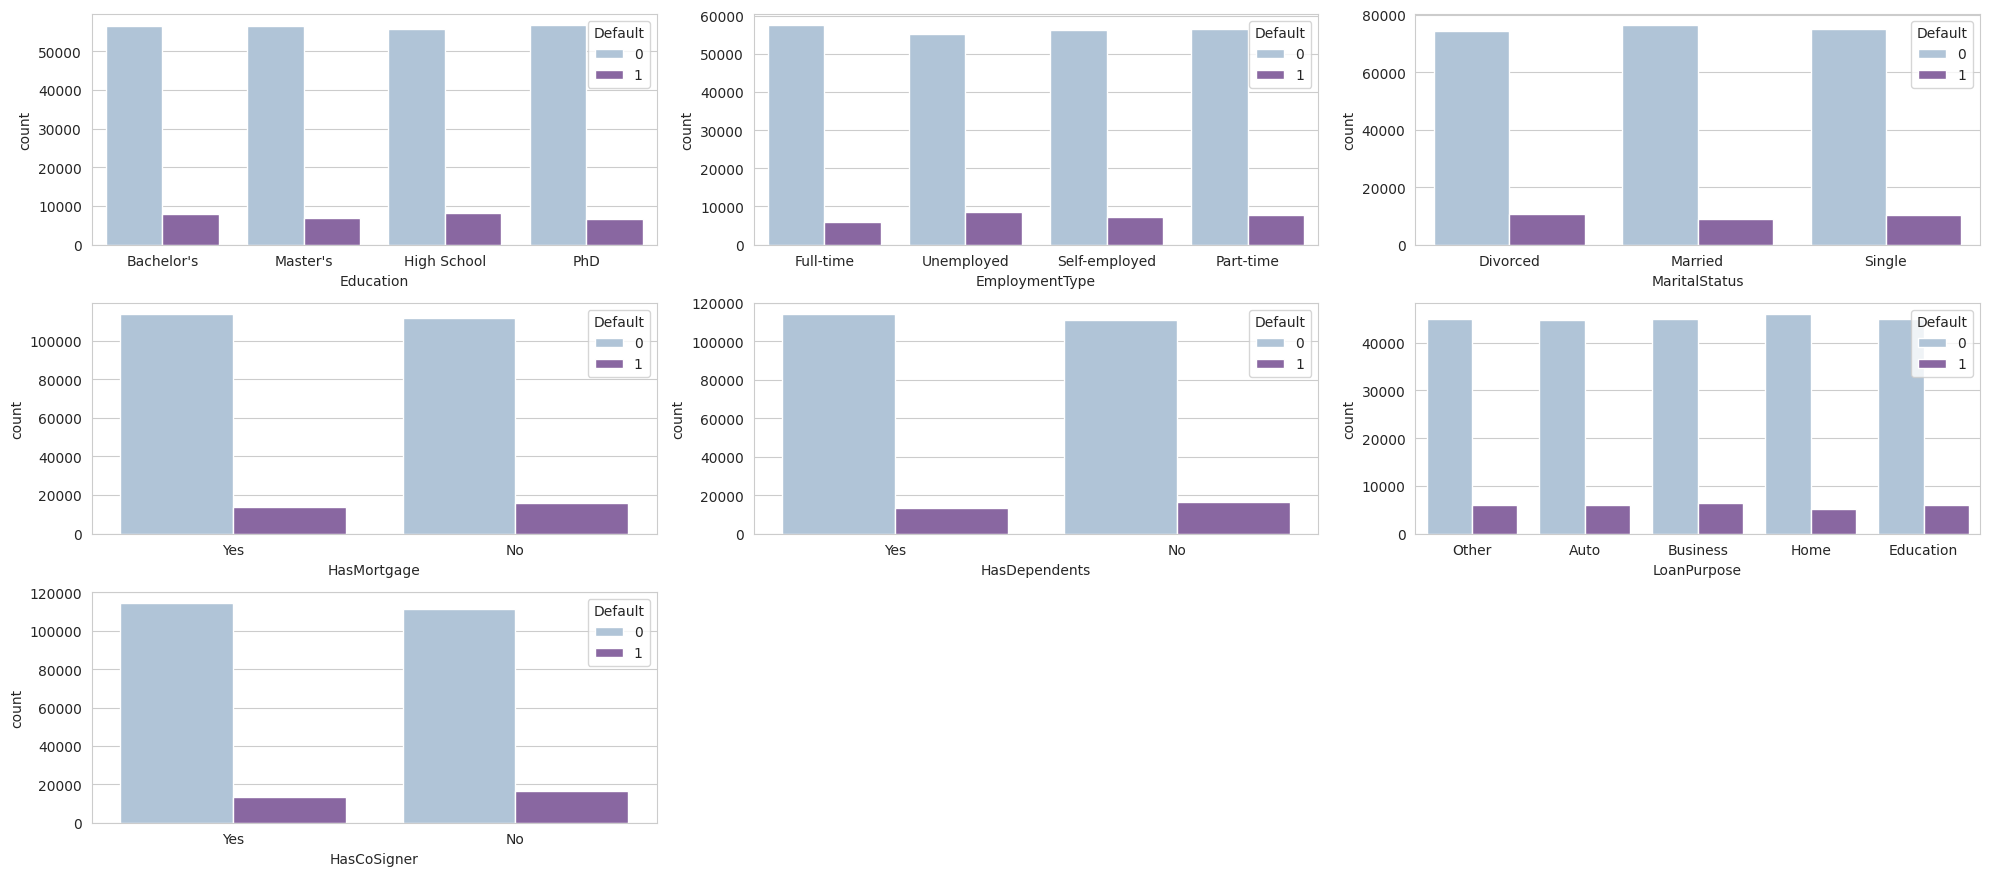

In [ ]:
# Create subplots
plt.figure(figsize=(20, 20))
gridspec = plt.GridSpec(7, 3)
locator1, locator2 = [0, 0]

for column in categorical_cols:
    plt.subplot2grid((7, 3), (locator1, locator2))
    sns.countplot(x=column, hue='Default', data=data, palette='BuPu')
    locator2 += 1
    if locator2 == 3:
        locator1 += 1
        locator2 = 0
        continue
    if locator1 == 7:
        break
plt.tight_layout()
plt.show()

Looking at the categorical variables we can see that:

*   People with a high school level of education are more likely to default a loan.
*   People that work full-time a less likely to default a loan compared to their counterparts.
* People who have a Mortgage are likely to default
* People with no Cosigners are more likely to default a loan







### **Encoding categorical columns**

In [ ]:
#getting dummy values for categorical features and dropping the first
data = pd.get_dummies(data=data, columns=categorical_cols, drop_first=True)
display(data.head())

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Default,...,EmploymentType_Unemployed,MaritalStatus_Married,MaritalStatus_Single,HasMortgage_Yes,HasDependents_Yes,LoanPurpose_Business,LoanPurpose_Education,LoanPurpose_Home,LoanPurpose_Other,HasCoSigner_Yes
0,56,85994,50587,520,80,4,15.23,36,0.44,0,...,0,0,0,1,1,0,0,0,1,1
1,69,50432,124440,458,15,1,4.81,60,0.68,0,...,0,1,0,0,0,0,0,0,1,1
2,46,84208,129188,451,26,3,21.17,24,0.31,1,...,1,0,0,1,1,0,0,0,0,0
3,32,31713,44799,743,0,3,7.07,24,0.23,0,...,0,1,0,0,0,1,0,0,0,0
4,60,20437,9139,633,8,4,6.51,48,0.73,0,...,1,0,0,0,1,0,0,0,0,0


In [ ]:
#Scaling numerical features
numerical_features = ['Age', 'Income', 'LoanAmount', 'CreditScore', 'MonthsEmployed', 'NumCreditLines', 'InterestRate', 'LoanTerm', 'DTIRatio']
# Initialise the Scaler
scaler = StandardScaler()

# To scale data
scaled_data = scaler.fit_transform(data[numerical_features])
scaled_data = pd.DataFrame(scaled_data, columns=numerical_features)
scaled_data.head()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio
0,0.833990,0.089693,-1.086833,-0.341492,0.590533,1.341937,0.261771,-0.001526,-0.260753
1,1.701221,-0.823021,-0.044309,-0.731666,-1.285731,-1.343791,-1.308350,1.412793,0.778585
2,0.166888,0.043854,0.022715,-0.775718,-0.968209,0.446694,1.156831,-0.708685,-0.823728
3,-0.767053,-1.303452,-1.168538,1.061875,-1.718715,0.446694,-0.967805,-0.708685,-1.170174
4,1.100830,-1.592855,-1.671921,0.369631,-1.487790,1.341937,-1.052188,0.705634,0.995114


In [ ]:
#Update the dataframe with the scaled data
for i in numerical_features:
    data[i] = scaled_data[i]
data.head()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Default,...,EmploymentType_Unemployed,MaritalStatus_Married,MaritalStatus_Single,HasMortgage_Yes,HasDependents_Yes,LoanPurpose_Business,LoanPurpose_Education,LoanPurpose_Home,LoanPurpose_Other,HasCoSigner_Yes
0,0.833990,0.089693,-1.086833,-0.341492,0.590533,1.341937,0.261771,-0.001526,-0.260753,0,...,0,0,0,1,1,0,0,0,1,1
1,1.701221,-0.823021,-0.044309,-0.731666,-1.285731,-1.343791,-1.308350,1.412793,0.778585,0,...,0,1,0,0,0,0,0,0,1,1
2,0.166888,0.043854,0.022715,-0.775718,-0.968209,0.446694,1.156831,-0.708685,-0.823728,1,...,1,0,0,1,1,0,0,0,0,0
3,-0.767053,-1.303452,-1.168538,1.061875,-1.718715,0.446694,-0.967805,-0.708685,-1.170174,0,...,0,1,0,0,0,1,0,0,0,0
4,1.100830,-1.592855,-1.671921,0.369631,-1.487790,1.341937,-1.052188,0.705634,0.995114,0,...,1,0,0,0,1,0,0,0,0,0


Sampling the dataset since it was a huge dataset

In [ ]:
data = data.sample(n=10000, random_state=42).copy()

## **Feature Importance Selection**

In [ ]:
data = data.copy()
#Separate features from the target variable
X = data.drop(['Default'], axis=1)
y = data['Default']

Using the Random Forest regressor to select important features: Random Forest Regressor model is instantiated and fitted to the data. The feature_importances_ attribute of the fitted model is used to obtain the importance scores of each feature. These importance scores indicate the relative contribution of each feature to the model’s predictions.

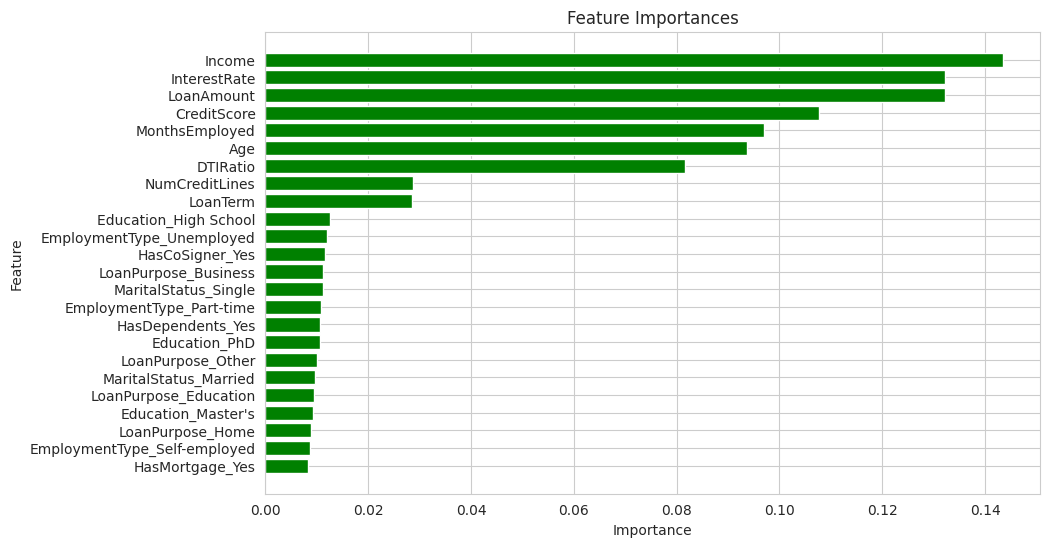

In [ ]:
rf_regressor = RandomForestRegressor(n_estimators=10, random_state=42)
rf_regressor.fit(X, y)
feature_importances = rf_regressor.feature_importances_


importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)


plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='green')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.gca().invert_yaxis()
plt.show()

From the graph above features with longer bars are deemed more significant in predicting loan defaulters. For this case I will select the features whose importance > 0.02: [NumCreditLines, LoanTerm, Age, DTIRatio, MonthsEmployed, CreditScore, InterestRate, LoanAmount, Income]

Using SelectKBest method to select feature importance: Selects the top k features based on univariate statistical tests. The term "univariate" means that it considers each feature individually.

In [ ]:
#Feature selection using SelectKBest:
#Selects the top k features based on univariate statistical tests
k_best = SelectKBest(score_func=f_classif, k=12)
X_new = k_best.fit_transform(X, y)
selected_feature_indices = k_best.get_support(indices=True)
selected_columns = X.columns[selected_feature_indices]
X_new_df = X[selected_columns]
X_new_df.head()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,InterestRate,Education_High School,Education_PhD,EmploymentType_Unemployed,HasDependents_Yes,LoanPurpose_Home,HasCoSigner_Yes
51139,0.767279,0.773984,-0.496691,0.042388,1.543098,1.513950,0,1,0,1,1,0
71005,0.833990,0.232778,0.056410,0.419976,-0.159972,0.255744,1,0,0,1,0,1
35684,-1.167314,-0.111139,-0.736328,-0.033129,1.312173,0.682178,0,0,0,1,0,1
174087,-1.167314,-0.499611,-1.648418,-1.562359,1.687426,0.183416,1,0,0,0,0,1
137952,-1.300734,-1.356014,-1.501920,0.552131,1.225576,0.230128,0,1,1,1,0,1


In [ ]:
#Selected columns
selected_cols = ['Income', 'LoanAmount', 'InterestRate', 'CreditScore', 'MonthsEmployed', 'DTIRatio', 'Age', 'LoanTerm', 'NumCreditLines']
X_df = X[selected_cols]
X_df.head()

,Income,LoanAmount,InterestRate,CreditScore,MonthsEmployed,DTIRatio,Age,LoanTerm,NumCreditLines
51139,0.773984,-0.496691,1.513950,0.042388,1.543098,-1.516620,0.767279,-0.001526,-0.448549
71005,0.232778,0.056410,0.255744,0.419976,-0.159972,-0.304059,0.833990,-1.415845,-1.343791
35684,-0.111139,-0.736328,0.682178,-0.033129,1.312173,-0.910339,-1.167314,-1.415845,0.446694
174087,-0.499611,-1.648418,0.183416,-1.562359,1.687426,-0.390670,-1.167314,-0.708685,-1.343791
137952,-1.356014,-1.501920,0.230128,0.552131,1.225576,0.821891,-1.300734,1.412793,0.446694


## **Model Building**

### Implementing: Decision Tree, Random Forest, SVM, KNN, NaiveBayes, Logistic regression/ XGBoost

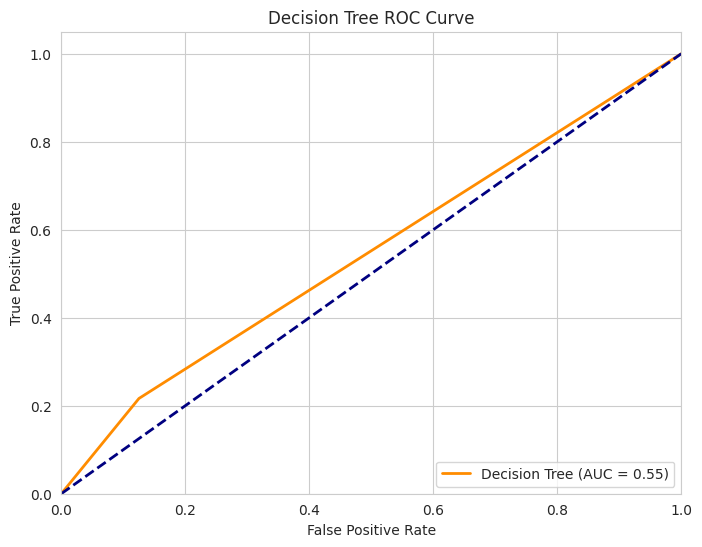

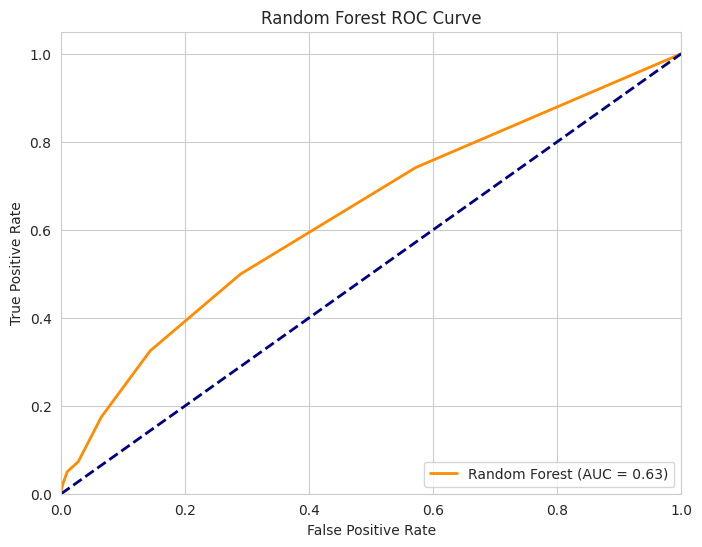

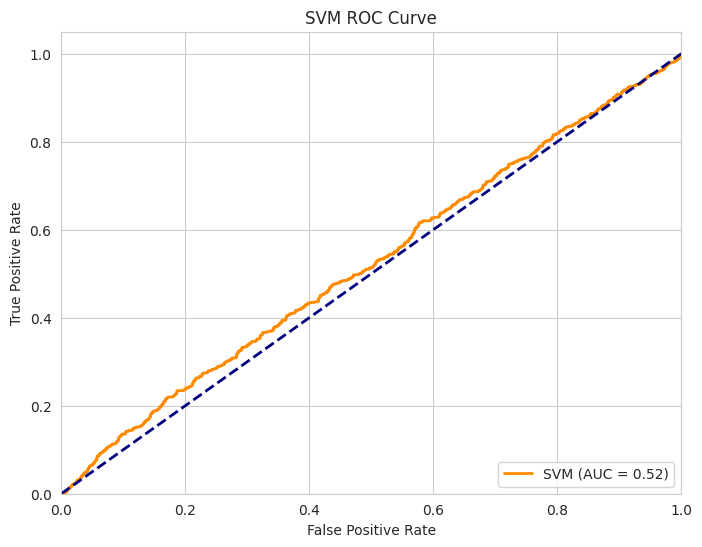

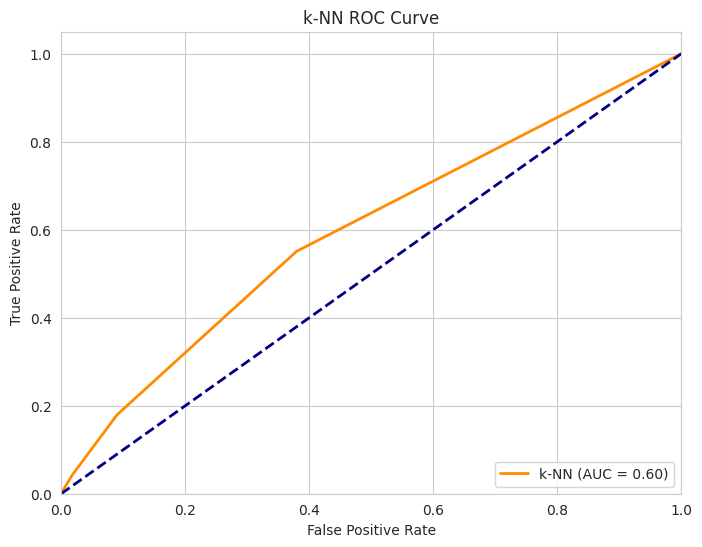

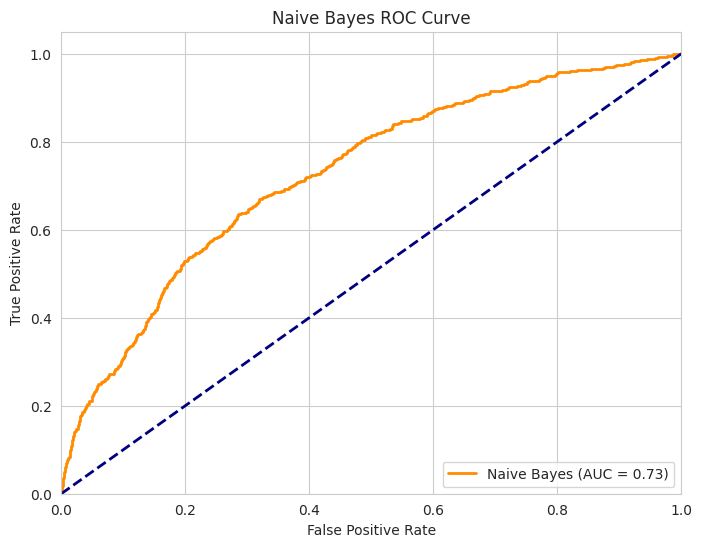

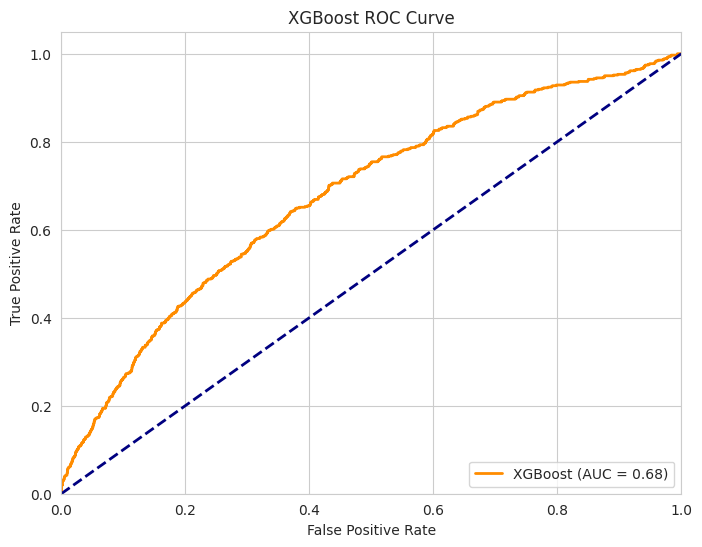

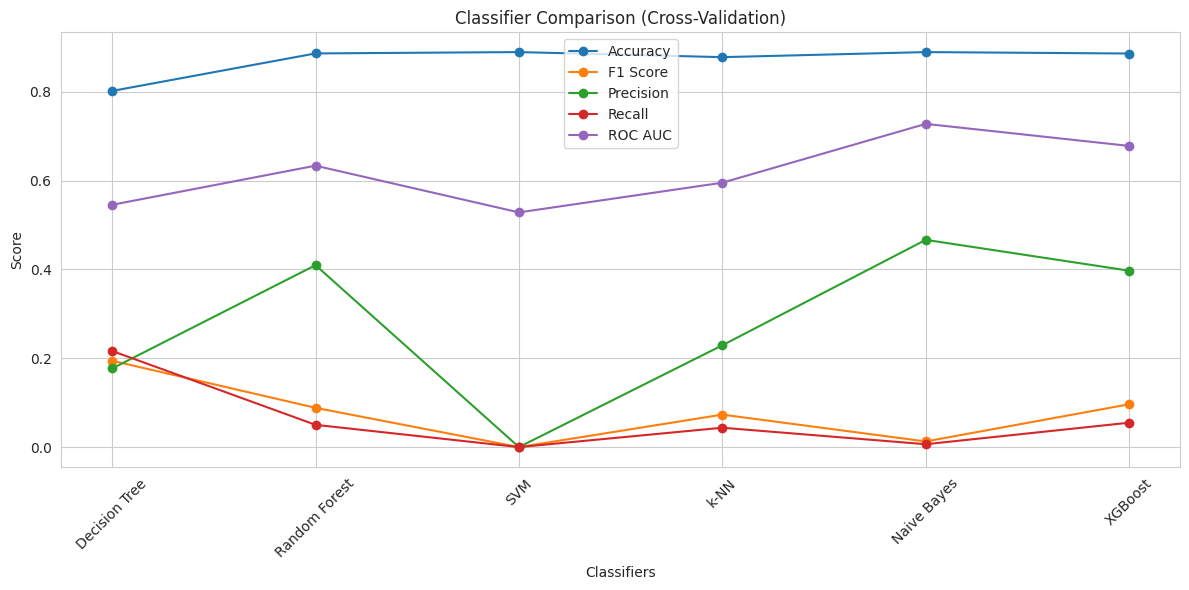

      Classifier  Accuracy  F1 Score  Precision    Recall   ROC AUC
0  Decision Tree  0.801964  0.194470   0.177030  0.216444  0.545582
1  Random Forest  0.886429  0.088474   0.409665  0.050118  0.633670
2            SVM  0.889464  0.000000   0.000000  0.000000  0.528470
3           k-NN  0.878036  0.073113   0.229257  0.043588  0.595334
4    Naive Bayes  0.889464  0.012699   0.466667  0.006452  0.727801
5        XGBoost  0.886250  0.096429   0.397221  0.054931  0.678166


In [ ]:
# Split the data into training, test and validation sets

# First, split into training and temporary data (which will further be split into validation and test)
X_train_temp, X_test, y_train_temp, y_test = train_test_split(X_df, y, test_size=0.2, random_state=42)

# Then, split the temporary data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train_temp, y_train_temp, test_size=0.3, random_state=42)

classifiers = {
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=10, random_state=42),
    'SVM': SVC(kernel='linear', random_state=42, probability=True),  # Enable probability estimates
    'k-NN': KNeighborsClassifier(n_neighbors=5),
    'Naive Bayes': GaussianNB(),
    'XGBoost': xgb.XGBClassifier(n_estimators=10, random_state=42),

}

# Initialize dictionaries to store evaluation metric results
results = {
    'Classifier': [],
    'Accuracy': [],
    'F1 Score': [],
    'Precision': [],
    'Recall': [],
    'ROC AUC': []
}

# Loop through classifiers and calculate various evaluation metrics using cross-validation
for classifier_name, classifier in classifiers.items():
    y_scores = cross_val_predict(classifier, X_train, y_train, cv=5, method='predict_proba')[:, 1]

    accuracy_scores = cross_val_score(classifier, X_train, y_train, cv=5, scoring='accuracy')
    f1_scores = cross_val_score(classifier, X_train, y_train, cv=5, scoring='f1')
    precision_scores = cross_val_score(classifier, X_train, y_train, cv=5, scoring='precision')
    recall_scores = cross_val_score(classifier, X_train, y_train, cv=5, scoring='recall')
    roc_auc_scores = cross_val_score(classifier, X_train, y_train, cv=5, scoring='roc_auc')

    # Take the mean of cross-validation scores
    accuracy_mean = np.mean(accuracy_scores)
    f1_mean = np.mean(f1_scores)
    precision_mean = np.mean(precision_scores)
    recall_mean = np.mean(recall_scores)
    roc_auc_mean = np.mean(roc_auc_scores)

    results['Classifier'].append(classifier_name)
    results['Accuracy'].append(accuracy_mean)
    results['F1 Score'].append(f1_mean)
    results['Precision'].append(precision_mean)
    results['Recall'].append(recall_mean)
    results['ROC AUC'].append(roc_auc_mean)

    # ROC curve
    fpr, tpr, _ = roc_curve(y_train, y_scores)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'{classifier_name} (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'{classifier_name} ROC Curve')
    plt.legend(loc='lower right')
    plt.show()

# Create line plots to compare evaluation metrics
plt.figure(figsize=(12, 6))
for metric_name, metric_results in {
    'Accuracy': results['Accuracy'],
    'F1 Score': results['F1 Score'],
    'Precision': results['Precision'],
    'Recall': results['Recall'],
    'ROC AUC': results['ROC AUC']
}.items():
    plt.plot(results['Classifier'], metric_results, label=metric_name, marker='o')

plt.xlabel('Classifiers')
plt.ylabel('Score')
plt.title('Classifier Comparison (Cross-Validation)')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


results_df = pd.DataFrame(results)
print(results_df)


**Summary of the performance of the models on the imbalanced training dataset:**
* **Decision Tree:** Has the worst AUC of 0.55 showing that the model can distinguish between between a loan that will default and those that won't 55% of the time. It has a precision of 0.177030 indicating that when the model predicts a loan default it is correct 17.70% of the time. It has a recall of 0.216444 indicating that the model identifies loan default 21.64% of the time. The F1 score of 0.194470 a combination of both precision and recall. The model is accurate 80.19% of the time

* **Random Forest:** Its accurate 88.64% of the time. Its precision is 0.409665 indicating that when the model predicts a loan default it is correct 40.97% of the time. It has a recall of 0.050118 indicating that the model identifies loan default 5.01% of the time. Its AUC is 0.63.

* **SVM:** Its accurate 88.94% of the time. It has the worst F1 score, precision, and recall. It has an AUC of 0.53

* **K-NN:** Its accurate 87.80% of the time. Its precision is 0.229257 indicating that when the model predicts a loan default it is correct 22.93% of the time. It has a recall of 0.043588 indicating that the model identifies loan default 4.36% of the time. Its AUC is 0.60.

* **Naive Bayes:** The model is accurate 88.95% of the time. It has an F1 score of  0.012699. Its precision is 0.466667 indicating that when the model predicts a loan default it is correct 46.67% of the time. It has a recall of 0.006452 indicating that the model identifies loan default 0.65% of the time. It has the best AUC of 0.73.

* **XGBoost:** The model is accurate 88.63% of the time. It has an F1 score of 0.096429. Its precision is 0.397221 indicating that when the model predicts a loan default it is correct 39.72% of the time. It has a recall of 0.054931 indicating that the model identifies loan default 5.50% of the time. Its AUC is 0.68

### **Handling data imbalance using SMOTE technique and training the model again**
**Synthetic Minority Oversampling Technique or SMOTE** is another technique to oversample the minority class. Simply adding duplicate records of minority class often don’t add any new information to the model.

In [ ]:
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

**Re-train the model using resampled training data**

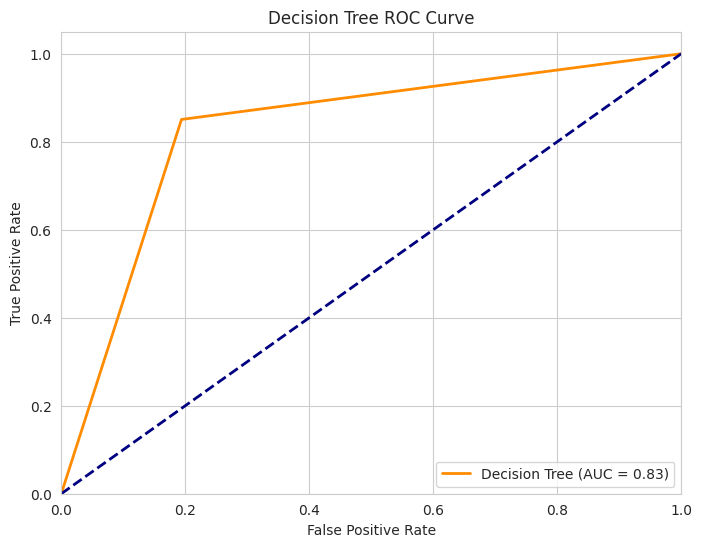

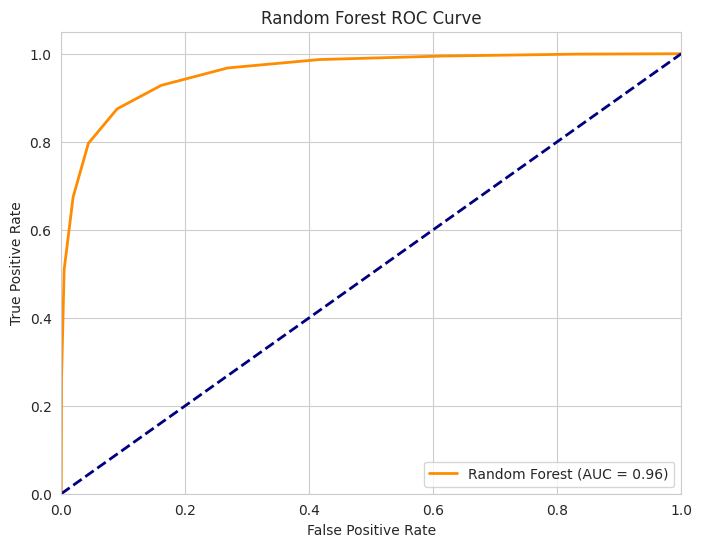

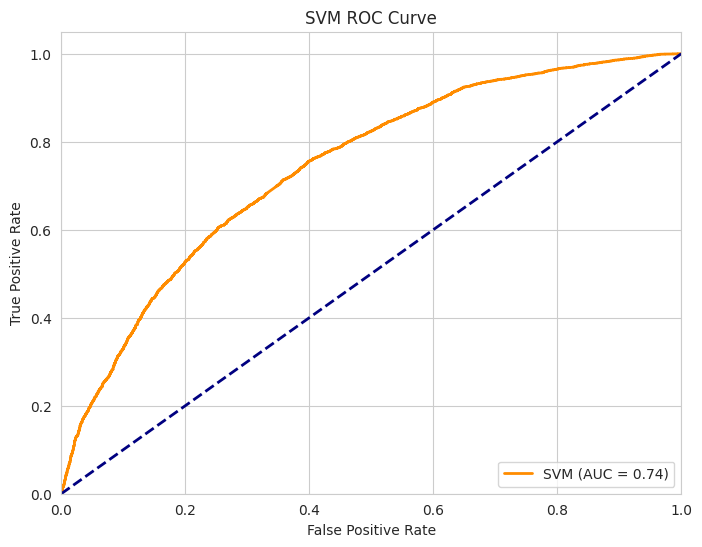

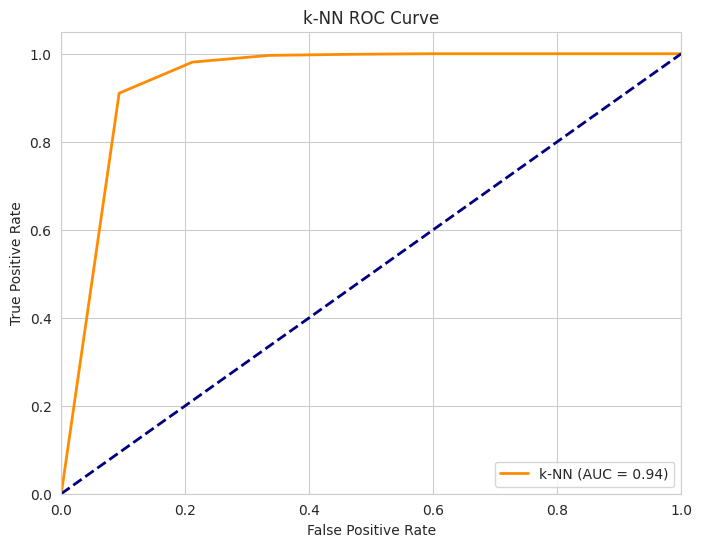

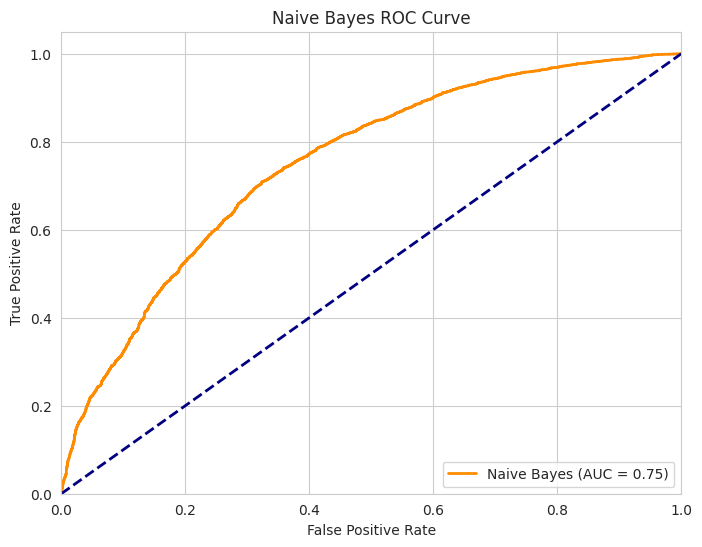

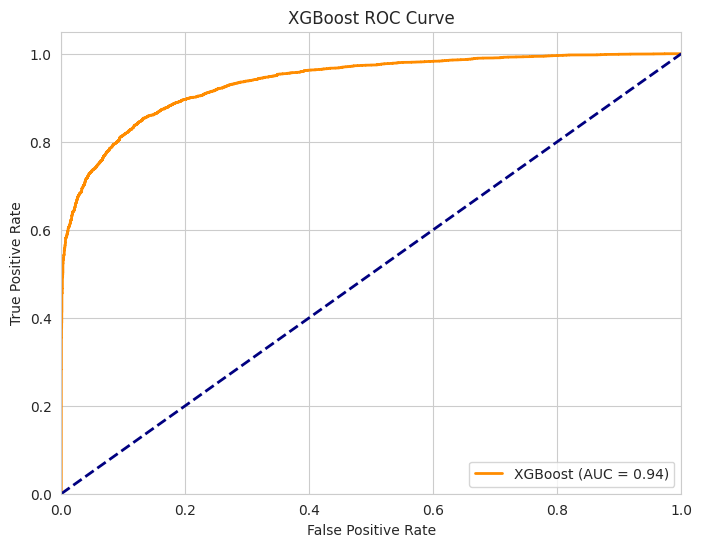

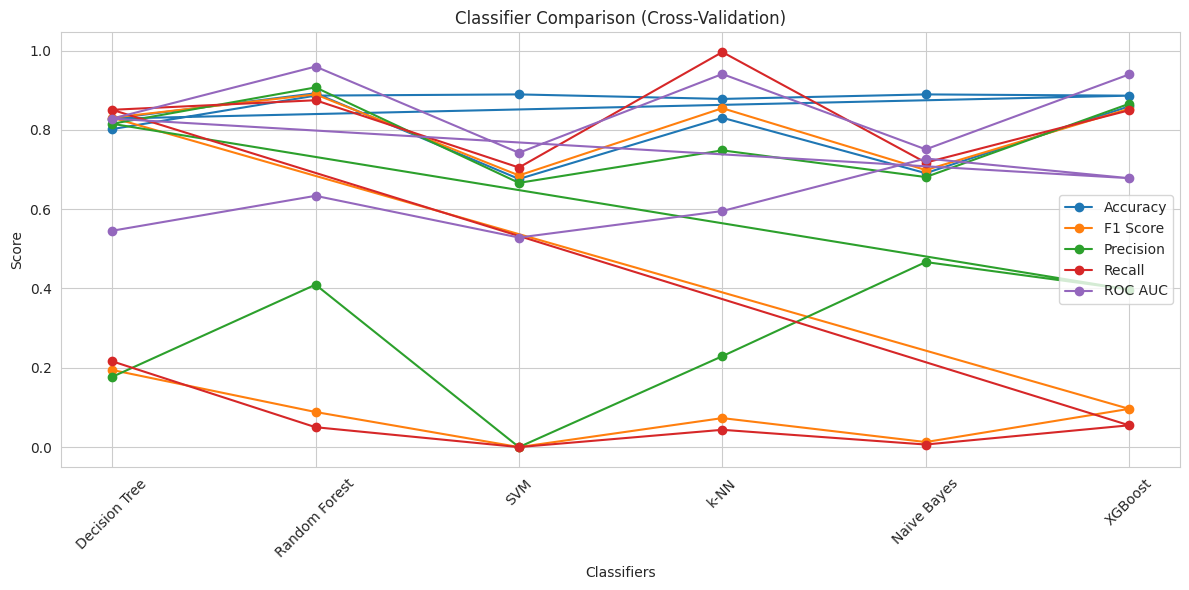

       Classifier  Accuracy  F1 Score  Precision    Recall   ROC AUC
0   Decision Tree  0.801964  0.194470   0.177030  0.216444  0.545582
1   Random Forest  0.886429  0.088474   0.409665  0.050118  0.633670
2             SVM  0.889464  0.000000   0.000000  0.000000  0.528470
3            k-NN  0.878036  0.073113   0.229257  0.043588  0.595334
4     Naive Bayes  0.889464  0.012699   0.466667  0.006452  0.727801
5         XGBoost  0.886250  0.096429   0.397221  0.054931  0.678166
6   Decision Tree  0.828351  0.830771   0.815354  0.850626  0.828339
7   Random Forest  0.892293  0.889473   0.907055  0.874716  0.959683
8             SVM  0.676168  0.685101   0.666365  0.705070  0.742215
9            k-NN  0.830556  0.854642   0.748334  0.996185  0.940861
10    Naive Bayes  0.690826  0.698702   0.681022  0.717520  0.750877
11        XGBoost  0.859272  0.853231   0.865772  0.849414  0.939900


In [ ]:
# Loop through classifiers and calculate various evaluation metrics using cross-validation
for classifier_name, classifier in classifiers.items():
    y_scores = cross_val_predict(classifier, X_train_resampled, y_train_resampled, cv=5, method='predict_proba')[:, 1]

    accuracy_scores = cross_val_score(classifier, X_train_resampled, y_train_resampled, cv=5, scoring='accuracy')
    f1_scores = cross_val_score(classifier, X_train_resampled, y_train_resampled, cv=5, scoring='f1')
    precision_scores = cross_val_score(classifier, X_train_resampled, y_train_resampled, cv=5, scoring='precision')
    recall_scores = cross_val_score(classifier, X_train_resampled, y_train_resampled, cv=5, scoring='recall')
    roc_auc_scores = cross_val_score(classifier, X_train_resampled, y_train_resampled, cv=5, scoring='roc_auc')

    # Take the mean of cross-validation scores
    accuracy_mean = np.mean(accuracy_scores)
    f1_mean = np.mean(f1_scores)
    precision_mean = np.mean(precision_scores)
    recall_mean = np.mean(recall_scores)
    roc_auc_mean = np.mean(roc_auc_scores)

    results['Classifier'].append(classifier_name)
    results['Accuracy'].append(accuracy_mean)
    results['F1 Score'].append(f1_mean)
    results['Precision'].append(precision_mean)
    results['Recall'].append(recall_mean)
    results['ROC AUC'].append(roc_auc_mean)

    # ROC curve
    fpr, tpr, _ = roc_curve(y_train_resampled, y_scores)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'{classifier_name} (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'{classifier_name} ROC Curve')
    plt.legend(loc='lower right')
    plt.show()

# Create line plots to compare evaluation metrics
plt.figure(figsize=(12, 6))
for metric_name, metric_results in {
    'Accuracy': results['Accuracy'],
    'F1 Score': results['F1 Score'],
    'Precision': results['Precision'],
    'Recall': results['Recall'],
    'ROC AUC': results['ROC AUC']
}.items():
    plt.plot(results['Classifier'], metric_results, label=metric_name, marker='o')

plt.xlabel('Classifiers')
plt.ylabel('Score')
plt.title('Classifier Comparison (Cross-Validation)')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


results_df = pd.DataFrame(results)
print(results_df)

**Summary:**
We can see that there is a great improvement in all the models when we train them on a balanced dataset. Random Forest emerges with the best AUC of 0.94. It correctly distinguishes between loans that will default from those that won't. Naive Bayes doesn't change much maintains it AUC of 0.75. Random Forest has the best precision of 0.907055 meaning that when the model predicts a loan default it is correct 90.71% of the time. KNN has the best recall of  0.996185 indicating that the model identifies loan default 99.61% of the time. Overall SVM has the worst performance and Random Forest has the best performance followed by XGBoost

## Hyper-parameter Tuning

In [ ]:
#Defining the models
dt_model = DecisionTreeClassifier(random_state=42)
rf_model = RandomForestClassifier(random_state=42)
svm_model = SVC(random_state=42, probability=True)
knn_model = KNeighborsClassifier()
nb_model = GaussianNB()
xgb_model = xgb.XGBClassifier(random_state=42)

# Define parameter grids for each model
dt_param_grid = { 'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 3, 4, 5],
    'min_samples_leaf': [2, 3, 4, 5, 6, 10]}

rf_param_grid = {'n_estimators': [10, 50, 100],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]}
svm_param_grid = {'C': [0.1, 1, 10],
                  'gamma': [0.01, 0.1, 1],
                  'kernel': ['linear', 'rbf']}
knn_param_grid = {'n_neighbors': [3, 5, 7],
                  'weights': ['uniform', 'distance']}
nb_param_grid = {}  # Naive Bayes has no hyperparameters to tune
xgb_param_grid = {'n_estimators': [10, 30, 70, 100],
                  'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3],
                  'max_depth': [None, 10, 20, 30],
                  'subsample': [0.5, 1],_
                  'colsample_bytree':[0.5, 1]}

# Perform Grid Search
dt_grid = GridSearchCV(dt_model, dt_param_grid, scoring='roc_auc', cv=5)
rf_grid = GridSearchCV(rf_model, rf_param_grid, scoring='roc_auc', cv=5)
svm_grid = GridSearchCV(svm_model, svm_param_grid, scoring='roc_auc', cv=5)
knn_grid = GridSearchCV(knn_model, knn_param_grid, scoring='roc_auc', cv=5)
nb_grid = GridSearchCV(nb_model, nb_param_grid, scoring='roc_auc', cv=5)
xgb_grid = GridSearchCV(xgb_model, xgb_param_grid, scoring='roc_auc', cv=5)

# Fit the models
dt_grid.fit(X_train, y_train)
rf_grid.fit(X_train, y_train)
svm_grid.fit(X_train, y_train)
knn_grid.fit(X_train, y_train)
nb_grid.fit(X_train, y_train)
xgb_grid.fit(X_train, y_train)

# Print the best hyper-parameters
print("Best hyperparameters for DecisionTreeClassifier:", dt_grid.best_params_)
print("Best hyperparameters for RandomForestClassifier:", rf_grid.best_params_)
print("Best hyperparameters for SVMClassifier:", svm_grid.best_params_)
print("Best hyperparameters for KNNClassifier:", knn_grid.best_params_)
print("Best hyperparameters for NaiveBayesClassifier:", nb_grid.best_params_)
print("Best hyperparameters for XGBClassifier:", xgb_grid.best_params_)


Best hyperparameters for DecisionTreeClassifier: {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 6, 'min_samples_split': 2}
Best hyperparameters for RandomForestClassifier: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}
Best hyperparameters for SVMClassifier: {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
Best hyperparameters for KNNClassifier: {'n_neighbors': 7, 'weights': 'uniform'}
Best hyperparameters for NaiveBayesClassifier: {}
Best hyperparameters for XGBClassifier: {'colsample_bytree': 1, 'learning_rate': 0.01, 'max_depth': None, 'n_estimators': 100, 'subsample': 0.5}


## Model Evaluation

DT Validation AUC: 0.62
RF Validation AUC: 0.72
SVM Validation AUC: 0.62
KNN Validation AUC: 0.62
NB Validation AUC: 0.74
XGB Validation AUC: 0.73


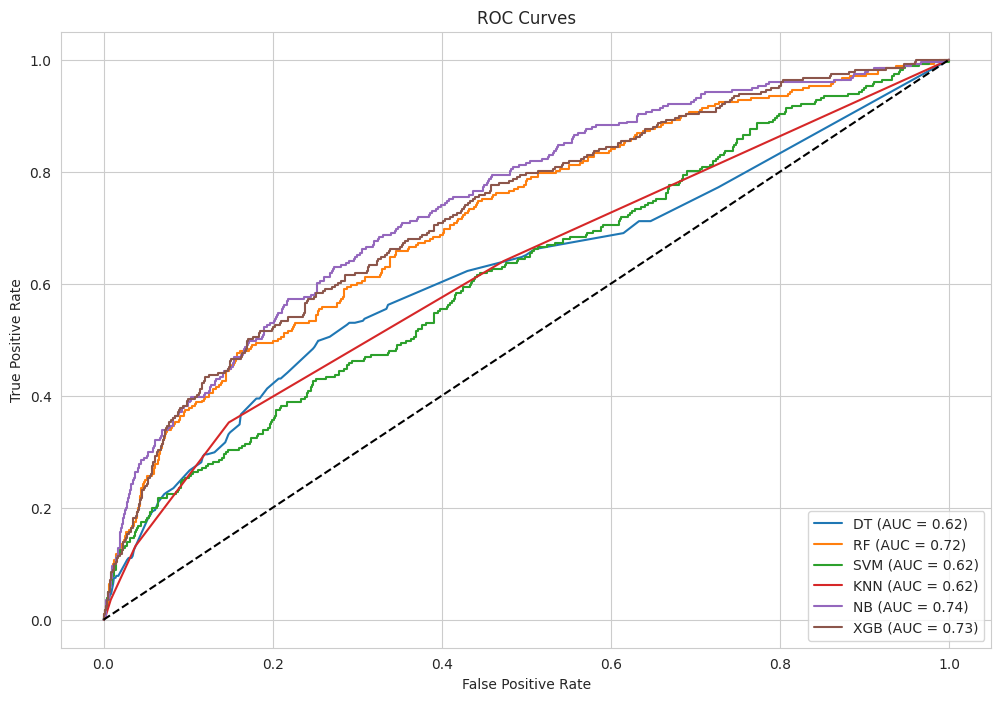

In [ ]:
# re-train the model using the best hyperparameters
best_dt_clf = dt_grid.best_estimator_
best_rf_clf = rf_grid.best_estimator_
best_svm_clf = svm_grid.best_estimator_
best_knn_clf = knn_grid.best_estimator_
best_nb_clf = nb_grid.best_estimator_
best_xgb_clf = xgb_grid.best_estimator_

# Evaluate models on the validation set
dt_val_auc = roc_auc_score(y_val, best_dt_clf.predict_proba(X_val)[:, 1])
rf_val_auc = roc_auc_score(y_val, best_rf_clf.predict_proba(X_val)[:, 1])
svm_val_auc = roc_auc_score(y_val, best_svm_clf.predict_proba(X_val)[:, 1])
knn_val_auc = roc_auc_score(y_val, best_knn_clf.predict_proba(X_val)[:, 1])
nb_val_auc = roc_auc_score(y_val, best_nb_clf.predict_proba(X_val)[:, 1])
xgb_val_auc = roc_auc_score(y_val, best_xgb_clf.predict_proba(X_val)[:, 1])

print(f'DT Validation AUC: {dt_val_auc:.2f}')
print(f'RF Validation AUC: {rf_val_auc:.2f}')
print(f'SVM Validation AUC: {svm_val_auc:.2f}')
print(f'KNN Validation AUC: {knn_val_auc:.2f}')
print(f'NB Validation AUC: {nb_val_auc:.2f}')
print(f'XGB Validation AUC: {xgb_val_auc:.2f}')

#Visualize ROC curves
fpr_dt, tpr_dt, _ = roc_curve(y_val, best_dt_clf.predict_proba(X_val)[:, 1])
fpr_rf, tpr_rf, _ = roc_curve(y_val, best_rf_clf.predict_proba(X_val)[:, 1])
fpr_svm, tpr_svm, _ = roc_curve(y_val, best_svm_clf.predict_proba(X_val)[:, 1])
fpr_knn, tpr_knn, _ = roc_curve(y_val, best_knn_clf.predict_proba(X_val)[:, 1])
fpr_nb, tpr_nb, _ = roc_curve(y_val, best_nb_clf.predict_proba(X_val)[:, 1])
fpr_xgb, tpr_xgb, _ = roc_curve(y_val, best_xgb_clf.predict_proba(X_val)[:, 1])

plt.figure(figsize=(12, 8))
plt.plot(fpr_dt, tpr_dt, label='DT (AUC = {:.2f})'.format(dt_val_auc))
plt.plot(fpr_rf, tpr_rf, label='RF (AUC = {:.2f})'.format(rf_val_auc))
plt.plot(fpr_svm, tpr_svm, label='SVM (AUC = {:.2f})'.format(svm_val_auc))
plt.plot(fpr_knn, tpr_knn, label='KNN (AUC = {:.2f})'.format(knn_val_auc))
plt.plot(fpr_nb, tpr_nb, label='NB (AUC = {:.2f})'.format(nb_val_auc))
plt.plot(fpr_xgb, tpr_xgb, label='XGB (AUC = {:.2f})'.format(xgb_val_auc))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend(loc='lower right')
plt.show()


### Training the models on the entire training set

In [ ]:
best_dt_clf.fit(X_train_temp, y_train_temp)
best_nb_clf.fit(X_train_temp, y_train_temp)
best_rf_clf.fit(X_train_temp, y_train_temp)
best_xgb_clf.fit(X_train_temp, y_train_temp)
best_svm_clf.fit(X_train_temp, y_train_temp)
best_knn_clf.fit(X_train_temp, y_train_temp)

nb_entire_train_auc = roc_auc_score(y_train_temp, best_nb_clf.predict_proba(X_train_temp)[:, 1])
rf_entire_train_auc = roc_auc_score(y_train_temp, best_rf_clf.predict_proba(X_train_temp)[:, 1])
xgb_entire_train_auc = roc_auc_score(y_train_temp, best_xgb_clf.predict_proba(X_train_temp)[:, 1])
svm_entire_train_auc = roc_auc_score(y_train_temp, best_svm_clf.predict_proba(X_train_temp)[:, 1])
knn_entire_train_auc = roc_auc_score(y_train_temp, best_knn_clf.predict_proba(X_train_temp)[:, 1])
dt_entire_train_auc = roc_auc_score(y_train_temp, best_dt_clf.predict_proba(X_train_temp)[:, 1])

print(f'NB Entire Train AUC: {nb_entire_train_auc:.2f}')
print(f'RF Entire Train AUC: {rf_entire_train_auc:.2f}')
print(f'XGB Entire Train AUC: {xgb_entire_train_auc:.2f}')
print(f'DT Entire Train AUC: {dt_entire_train_auc:.2f}')
print(f'SVM Entire Train AUC: {svm_entire_train_auc:.2f}')
print(f'KNN Entire Train AUC: {knn_entire_train_auc:.2f}')

NB Entire Train AUC: 0.74
RF Entire Train AUC: 0.96
XGB Entire Train AUC: 0.84
DT Entire Train AUC: 0.91
SVM Entire Train AUC: 0.74
KNN Entire Train AUC: 0.86


Random Forest has the highest AUC of 0.96. Overall it has been the best algorithm with the best performance so its what I will use to make predictions on the test dataset

## Making Predictions on the Test Dataset Using the Best Model (Random Forest)

In [ ]:
#Making predictions
y_predictions = best_rf_clf.predict(X_test)

#Evaluating Performance of the model
accuracy = accuracy_score(y_test, y_predictions)*100
confusion = confusion_matrix(y_test, y_predictions)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", confusion)
print("Report : ", classification_report(y_test, y_predictions))

Accuracy: 88.9
Confusion Matrix:
 [[1766    1]
 [ 221   12]]
Report :                precision    recall  f1-score   support

           0       0.89      1.00      0.94      1767
           1       0.92      0.05      0.10       233

    accuracy                           0.89      2000
   macro avg       0.91      0.53      0.52      2000
weighted avg       0.89      0.89      0.84      2000



The model has an accuracy of 88.9% meaning 88.9% of the predictions made on the test dataset are correct.
* True Positive (TP): 1766
* False Positive (FP): 1
* False Negative (FN): 221
* True Negative (TN): 12

* **Precision:** Out of all the instances predicted as not being loan defaults, 89% are actually positive.
* **Recall:** The model correctly identifies 5% of all actual loan default instances.
* **F1 score:** The model's F1-score is 0.10 for the positive class, indicating a poor balance between precision and recall for that class.
* **Suppport:** The actual number of occurrences of each class in the dataset. There are 1767 instances of class 0 and 233 instances of class 1.

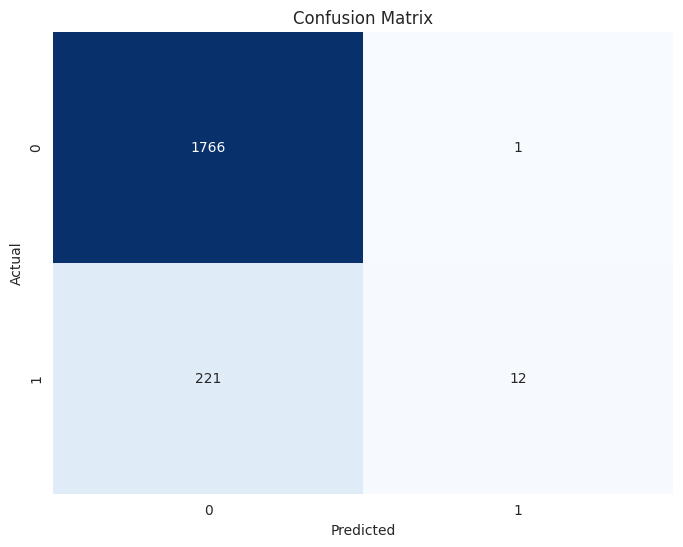

In [ ]:
#Visualizing the performance of a decision tree using a confusion matrix
# Create a heatmap of the confusion matrix

plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=rf_grid.classes_, yticklabels=rf_grid.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()